![GWU Logo](gw_horizontal_2c_rev.png){width=600px}

# EXAMINING ROAD SAFETY IN WASHINGTON DC

**SPATIAL JOINS AND VISUALIZATIONS**

>DR JHK

## Introduction

Data with latitude and longitude coordinates are often used in the public health setting. It is common to join these point locations to other spatial data, such as census tracts or neighborhoods, to better understand the context of the data.

In this notebook we will explore traffic crash data in the various wards of Washington, DC, focusing on spatial joins and visualizations to understand the distribution and characteristics of crashes.

## Import Python Libraries

The following code imports the necessary Python libraries for data manipulation, geospatial analysis, and visualization used in this notebook.

In [189]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'retina'

## Import the Data

There are two datasets that we will be using in this notebook. Both datasets are from the DC Open Data portal. The first dataset contains information on traffic crashes in Washington, DC. The second dataset contains the boundaries of the wards in Washington, DC.

Both files are in `geojson` format. They are imported below using the `read_file` function from the `geopandas` library. The resultant GeoDataFrame objects are assigned to the variables `crashes` and `wards`, respectively.

In [109]:
# Import the `Crashes_in_DC.geojson` and assign it to the variable `crashes`
# Import the `DC_Wards_from_2022.geojson` files and assign it to the variable `wards`
crashes = gpd.read_file('Crashes_in_DC.geojson')
wards = gpd.read_file('DC_Wards_from_2022.geojson')

Below, we calculate the total number of crashes (rows) in the dataset, as well as the number of variables (columns).

In [110]:
# Return the shape of the `crashes` GeoDataFrame
crashes.shape

(337788, 65)

The `crashes` GeoDataFrame consists of $337788$ observations and $65$ variables. A list of the column names is provided below.

In [111]:
print(crashes.columns)

Index(['CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID', 'MEASURE', 'OFFSET',
       'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE', 'TODATE', 'ADDRESS',
       'LATITUDE', 'LONGITUDE', 'XCOORD', 'YCOORD', 'WARD', 'EVENTID',
       'MAR_ADDRESS', 'MAR_SCORE', 'MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
       'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'LOCATIONERROR',
       'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE', 'MPDGEOX', 'MPDGEOY',
       'FATALPASSENGER', 'MAJOR

We will only use a subset of the variables. These are listed below and assigned to the variable `columns`.

In [113]:
# List of columns to keep assigned to the variable `columns`
columns = ['FROMDATE', 'WARD', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'SPEEDING_INVOLVED', 'geometry']

The selected columns are used as index and the GeoDataFrame, `crashes`, is overwritten.

In [114]:
# Reassign `crashes` to only include the columns in the list `columns`
crashes = crashes[columns]

The `info` method is used to display a concise summary of the `crashes` GeoDataFrame, including the number of entries, column names, data types, and memory usage.

In [115]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 337788 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337725 non-null  datetime64[ms, UTC]
 1   WARD               337786 non-null  object             
 2   TOTAL_VEHICLES     337788 non-null  int32              
 3   TOTAL_BICYCLES     337788 non-null  int32              
 4   TOTAL_PEDESTRIANS  337788 non-null  int32              
 5   SPEEDING_INVOLVED  337788 non-null  int32              
 6   geometry           337788 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 12.9+ MB


There are observations without date and time information in the `FROMDATE` column. These observations are removed using the `dropna` method. The `inplace=True` argument ensures that the changes are applied directly to the `crashes` GeoDataFrame.

In [116]:
# Remove observations without date and time information in the `FROMDATE` column
crashes.dropna(subset=['FROMDATE'], inplace=True)

In [117]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 337725 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337725 non-null  datetime64[ms, UTC]
 1   WARD               337723 non-null  object             
 2   TOTAL_VEHICLES     337725 non-null  int32              
 3   TOTAL_BICYCLES     337725 non-null  int32              
 4   TOTAL_PEDESTRIANS  337725 non-null  int32              
 5   SPEEDING_INVOLVED  337725 non-null  int32              
 6   geometry           337725 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 15.5+ MB


Two cases have no indication of the ward in which they occurred. These are also removed using the `dropna` method.

In [118]:
# Remove observations without data in the `WARD` column
crashes.dropna(subset=['WARD'], inplace=True)

In [119]:
# Display information about the `crashes` GeoDataFrame
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 337723 entries, 0 to 337787
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   FROMDATE           337723 non-null  datetime64[ms, UTC]
 1   WARD               337723 non-null  object             
 2   TOTAL_VEHICLES     337723 non-null  int32              
 3   TOTAL_BICYCLES     337723 non-null  int32              
 4   TOTAL_PEDESTRIANS  337723 non-null  int32              
 5   SPEEDING_INVOLVED  337723 non-null  int32              
 6   geometry           337723 non-null  geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(4), object(1)
memory usage: 15.5+ MB


We create three new columns using the `FROMDATE` columns. The first is `YEAR` and contains the year of the accident. The second is `MONTH` and contains the month of the accident. The third is `HOUR` and contains data on the hour of the accident.

In [120]:
# Create a new column `YEAR` by extracting the year from the `FROMDATE` column
crashes['YEAR'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.year)

We delete all observations with data prior to $2008$.

In [122]:
# Remove observations with a year prior to 2008
crashes = crashes[crashes['YEAR'] >= 2008]

In [123]:
# Create a new column `MONTH` by extracting the month for the `FROMDATE` column
crashes['MONTH'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.month)

In [124]:
# Create a new column `REPORTHOUR` by extracting the hour for the `FROMDATE` column
crashes['HOUR'] = np.int16(pd.to_datetime(crashes['FROMDATE']).dt.hour)

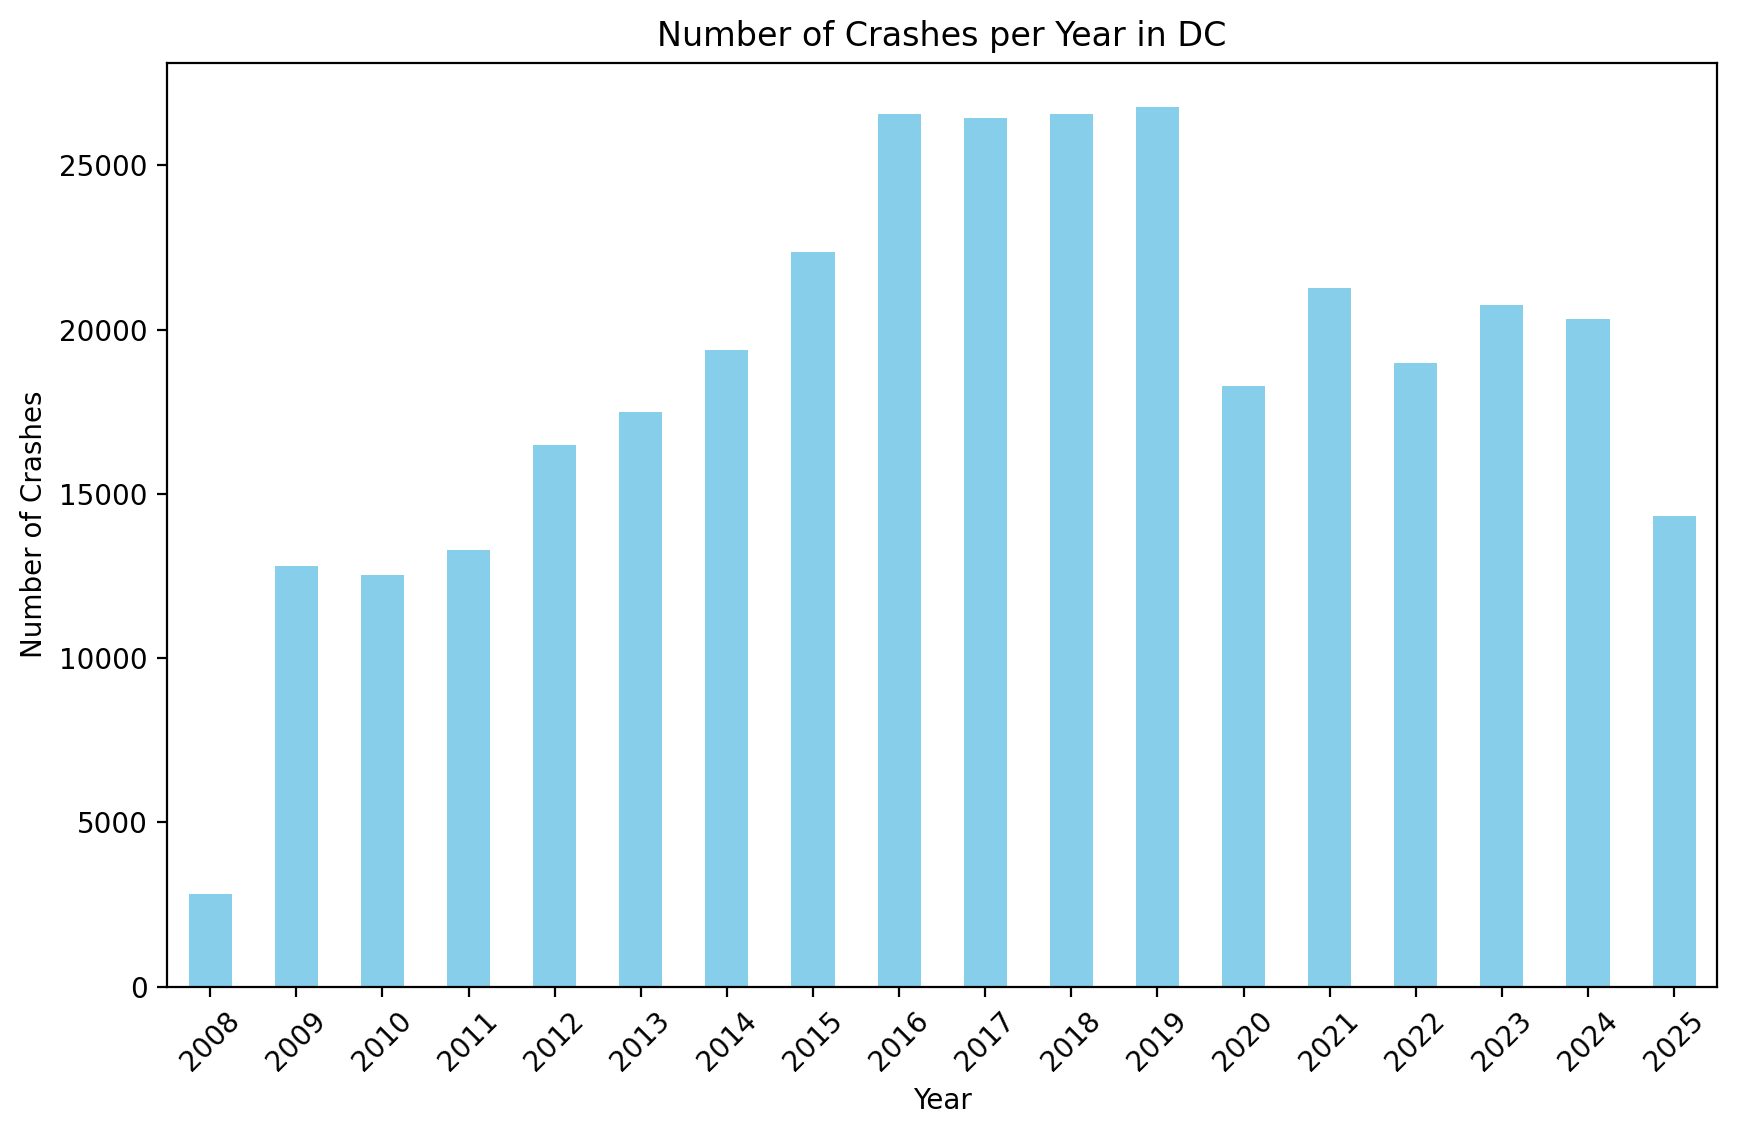

In [125]:
# Calculate the frequency of crashes per year and display the result as a bar chart
crashes_per_year = crashes['YEAR'].value_counts().sort_index()
crashes_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Crashes per Year in DC')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show();

There has been a decline in the frequency of crashes per year since the COVID-19 pandemic.

For further analysis, we only use data from $2024$ and assign it to the variable `crashes_2024`.

In [126]:
# Select only the rows for 2024 and assign it to the variable `crashes_2024`
crashes_2024 = crashes[crashes['YEAR'] == 2024]

In [127]:
# Display information about the `crashes_2024` GeoDataFrame
crashes_2024.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20322 entries, 303082 to 323491
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   FROMDATE           20322 non-null  datetime64[ms, UTC]
 1   WARD               20322 non-null  object             
 2   TOTAL_VEHICLES     20322 non-null  int32              
 3   TOTAL_BICYCLES     20322 non-null  int32              
 4   TOTAL_PEDESTRIANS  20322 non-null  int32              
 5   SPEEDING_INVOLVED  20322 non-null  int32              
 6   geometry           20322 non-null  geometry           
 7   YEAR               20322 non-null  int16              
 8   MONTH              20322 non-null  int16              
 9   HOUR               20322 non-null  int16              
dtypes: datetime64[ms, UTC](1), geometry(1), int16(3), int32(4), object(1)
memory usage: 1.0+ MB


## Data Analysis and Visualization

### Crashes per ward

Our aim is to understand the number of crashes per ward. There are eight wards.

In [139]:
# Calculate the frequency of wards
crashes_2024.WARD.value_counts()

WARD
Ward 2    3642
Ward 5    3326
Ward 6    3106
Ward 7    2997
Ward 8    2656
Ward 1    1792
Ward 4    1723
Ward 3    1076
Name: count, dtype: int64

There are four observations with `WARD` equal to the string `Null`. These are displayed below.

In [137]:
# Display the rows where `WARD` is `Null`
crashes_2024[crashes_2024['WARD'] == 'Null']

,FROMDATE,WARD,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,SPEEDING_INVOLVED,geometry,YEAR,MONTH,HOUR
306264,2024-03-01 17:08:00+00:00,Null,2,0,0,0,POINT Z (-77.02192 38.90232 0),2024,3,17
311765,2024-06-04 01:52:00+00:00,Null,2,0,0,0,POINT Z (-77.05269 38.96161 0),2024,6,1
312245,2024-06-14 12:47:00+00:00,Null,2,0,0,1,POINT Z (-77.0209 38.90324 0),2024,6,12
317286,2024-09-10 08:22:00+00:00,Null,2,0,0,0,POINT Z (-77.01858 38.90405 0),2024,9,8


These are removed using the `dropna` method.

In [138]:
# Remove the four observations with `WARD` equal to the string `Null`. These are removed using the `dropna` method.
crashes_2024 = crashes_2024[crashes_2024['WARD'] != 'Null']

A repeat of the frequency of the wards shows that these four observations have been removed.

In [140]:
# Calculate the frequency of wards
crashes_2024.WARD.value_counts()

WARD
Ward 2    3642
Ward 5    3326
Ward 6    3106
Ward 7    2997
Ward 8    2656
Ward 1    1792
Ward 4    1723
Ward 3    1076
Name: count, dtype: int64

Now for the spatial join. Both GeoDataFrame objects must have the same coordinate reference systems to do a spatial join. We verify this using the `crs` attribute.

In [141]:
# Check the coordinate reference systems (CRS)
print("Crashes CRS:", crashes_2024.crs)
print("Wards CRS:", wards.crs)

Crashes CRS: EPSG:4326
Wards CRS: EPSG:4326


Now we perform the spatial join usng the `sjoin` function. The `crashes_2024` GeoDataFrame is listed first and the `wards` GeoDataFram eobject second. The `how` keyword argument is set to `inner` (for points in the first GeoDataFrame within the polygons of the second). The result is assigned to the variable `crashes_with_wards`.

In [143]:
# Perform spatial join - this joins crash points to the ward polygons they fall within
crashes_with_wards = gpd.sjoin(crashes_2024, wards, how='inner', predicate='within')

In [144]:
# Display info about `crashes_with_wards`
crashes_with_wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20314 entries, 303082 to 323491
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   FROMDATE           20314 non-null  datetime64[ms, UTC]
 1   WARD_left          20314 non-null  object             
 2   TOTAL_VEHICLES     20314 non-null  int32              
 3   TOTAL_BICYCLES     20314 non-null  int32              
 4   TOTAL_PEDESTRIANS  20314 non-null  int32              
 5   SPEEDING_INVOLVED  20314 non-null  int32              
 6   geometry           20314 non-null  geometry           
 7   YEAR               20314 non-null  int16              
 8   MONTH              20314 non-null  int16              
 9   HOUR               20314 non-null  int16              
 10  index_right        20314 non-null  int64              
 11  WARD_right         20314 non-null  int32              
 12  NAME               20314 non-null  ob

The `WARD_ID` column contains the ward number for each crash. We use the `value_counts` method to display the frequency of crashes per ward.

In [146]:
# Count crashes per ward and assign to `crash_counts`
crash_counts = crashes_with_wards.groupby('WARD_ID').size().reset_index(name='crash_count')

The counts are shown below.

In [147]:
# Display the `crash_counts` DataFrame
crash_counts

,WARD_ID,crash_count
0,1,1776
1,2,3377
2,3,1102
3,4,1754
4,5,3317
5,6,2861
6,7,3260
7,8,2867


This pandas DataFrame object is merged with the `wards` GeoDataFrame using the `merge` method. Both the `wards` and the `crash_counts` objects have the column `WARD_ID` and we use it for the merge.

In [148]:
# Merge the counts back to the ward polygons
wards_with_counts = wards.merge(crash_counts, on='WARD_ID', how='left')

We can now visualize the counts per ward. To do so, we cange the coordinate refernce system to Web Marcator as our basemaps are in this projection.

In [150]:
# Change the CRS of the `wards_with_counts` GeoDataFrame to Web Mercator (EPSG:3857)
# and assign it to the variable `wards_web_mercator`
wards_web_mercator = wards_with_counts.to_crs(epsg=3857)

We can now plot the number of crashes per ward.

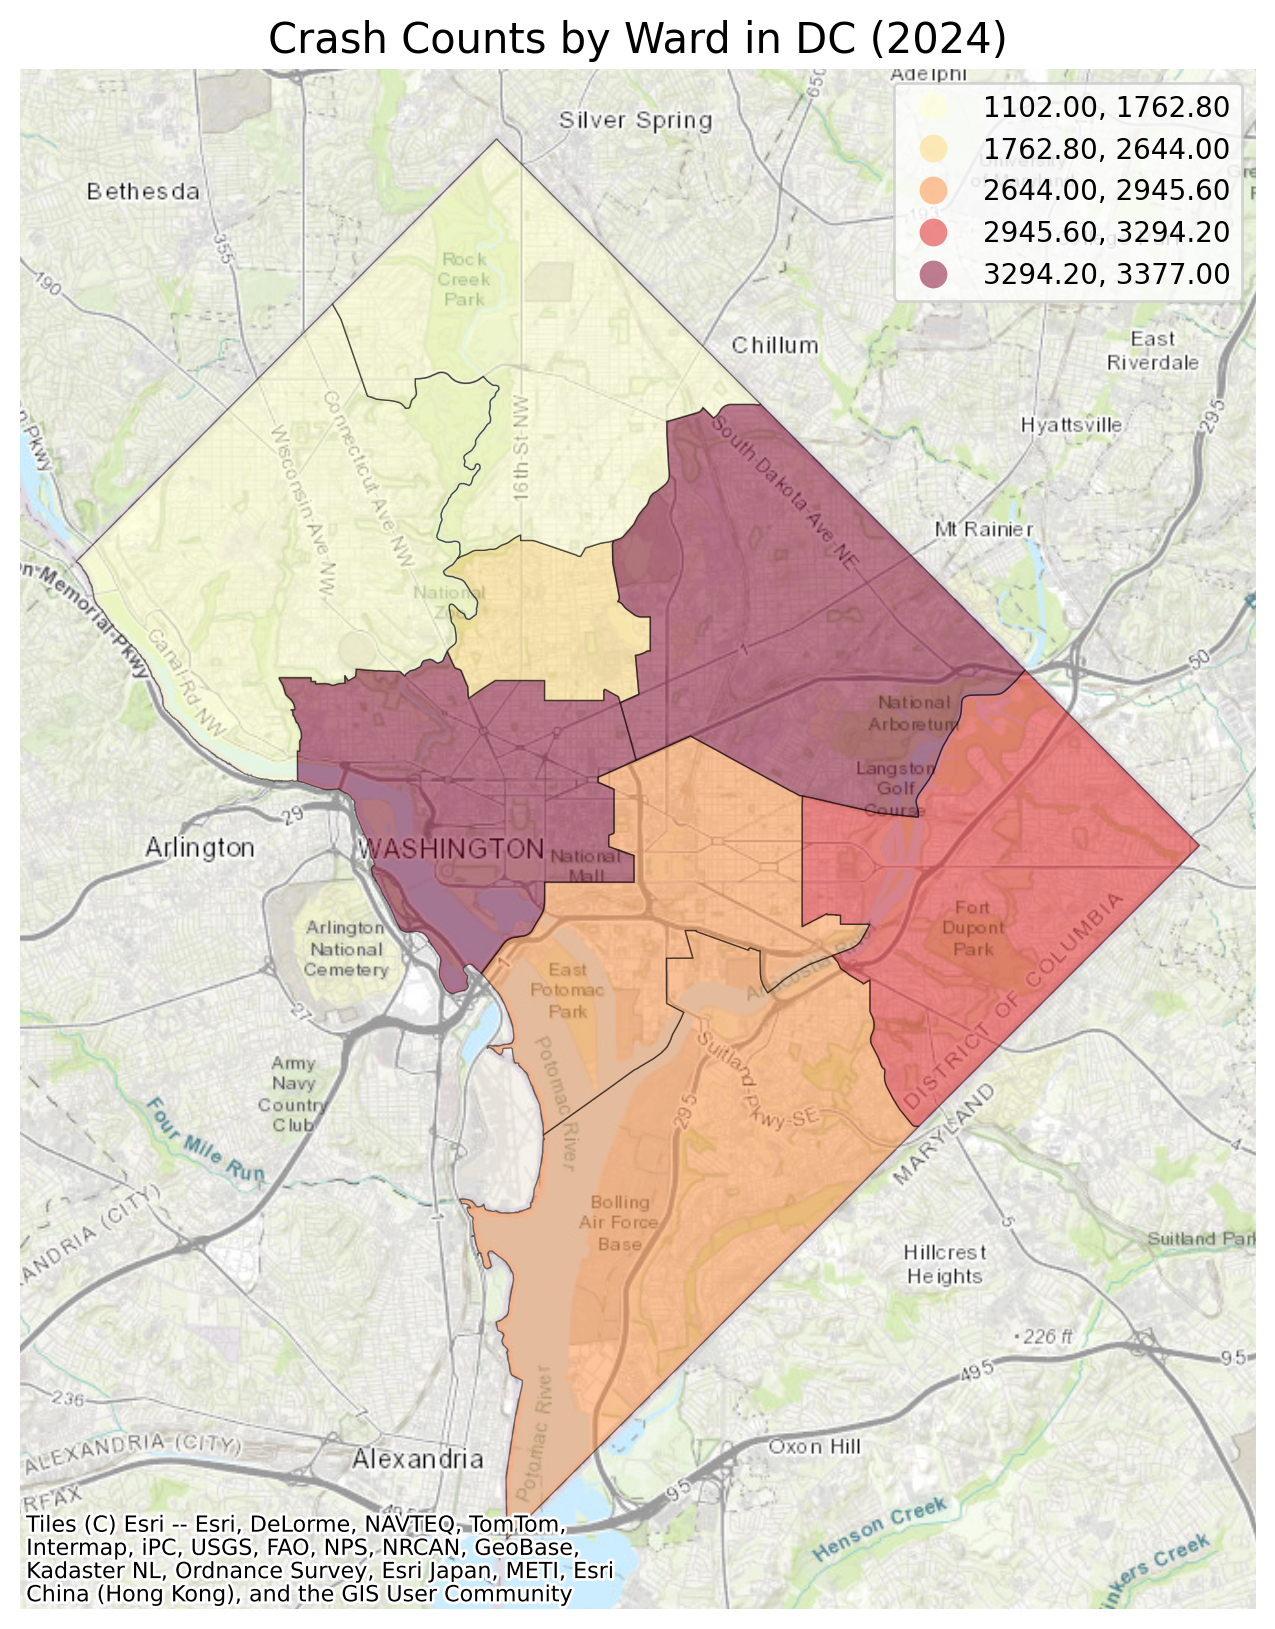

In [151]:
# Create a visualization of `wards_web_mercator` showing crash counts per ward
# Use a quantile scheme for coloring the wards based on crash counts
# Add a basemap for context
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot wards colored by crash count
wards_web_mercator.plot(column='crash_count',
                        scheme='quantiles',
                        ax=ax, 
                        legend=True,
                        cmap='YlOrRd',
                        edgecolor='black',
                        linewidth=0.5,
                        alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap)
ax.set_title('Crash Counts by Ward in DC (2024)', fontsize=15)
ax.axis('off')
plt.show();

### Point Pattern Analysis

In [170]:
# Create a new GeoDataFrame `crashes_2024_morning` from `crashes_2024` if the 'HOUR' is between midnight and midday
crashes_2024_morning = crashes_2024[(crashes_2024['HOUR'] >= 0) & (crashes_2024['HOUR'] < 12)]

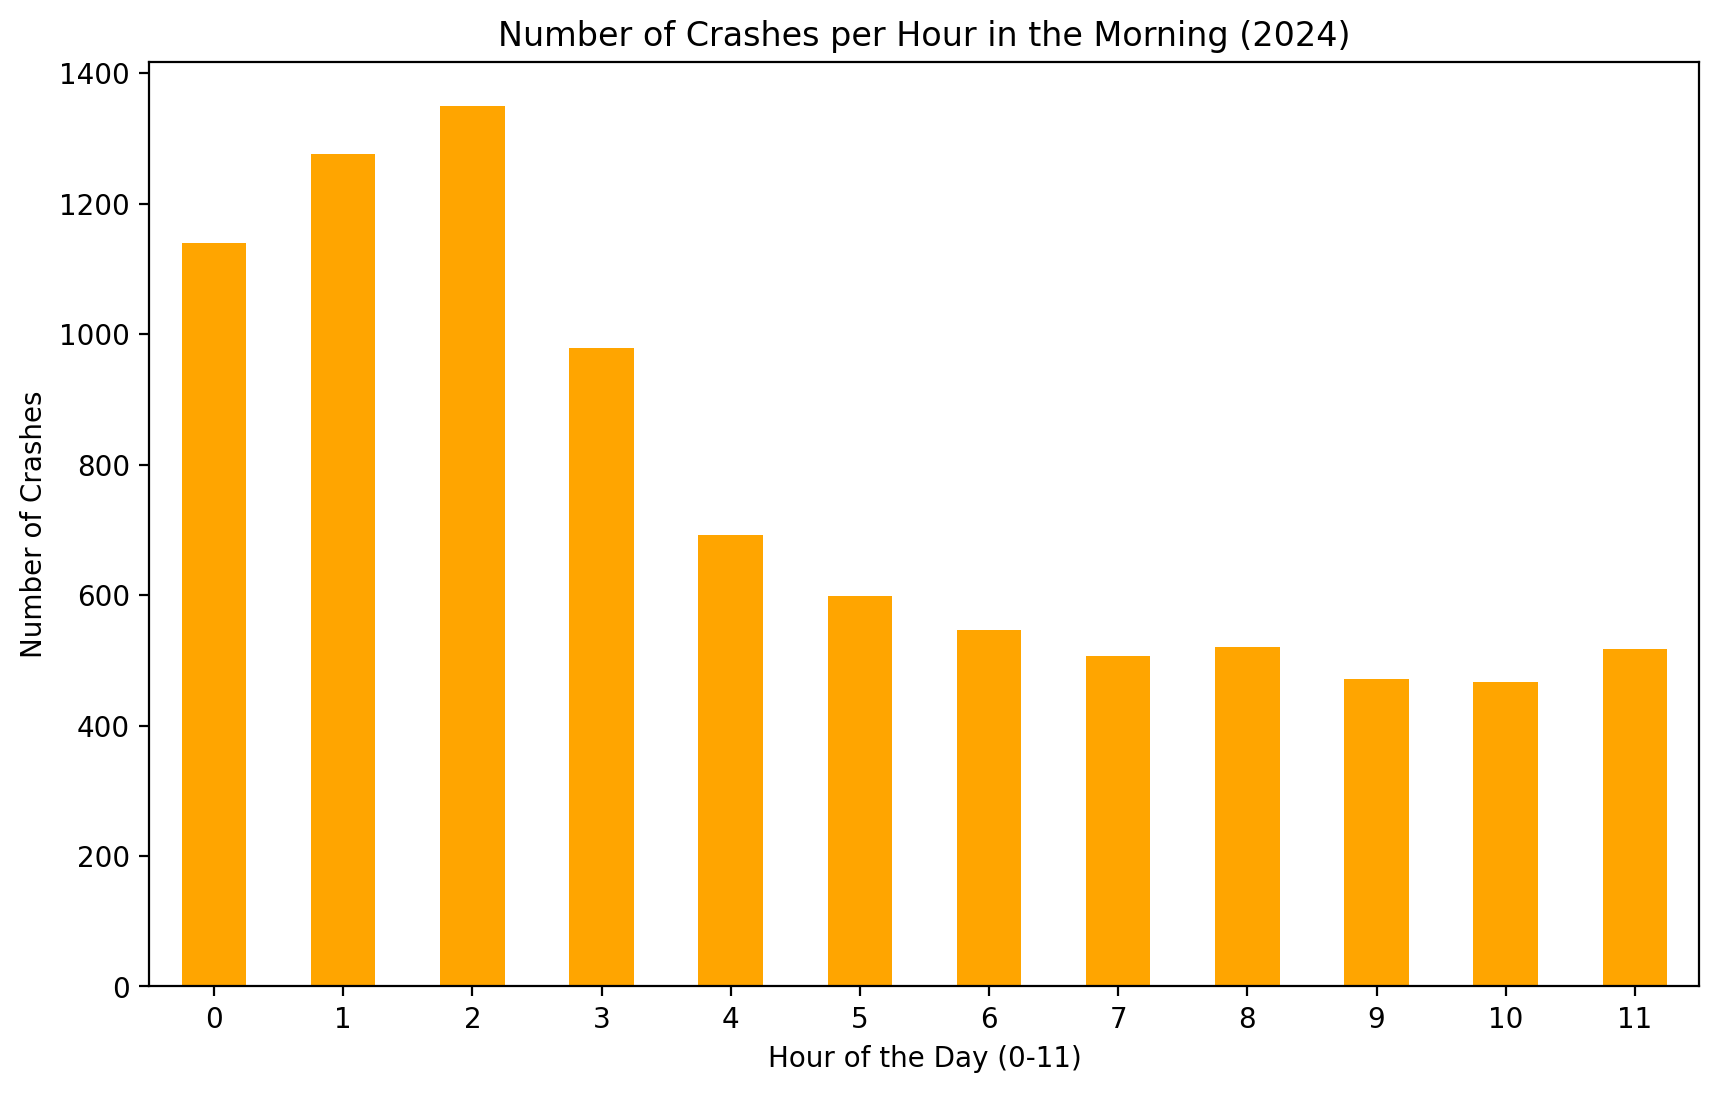

In [171]:
# Count the frequency of crashes per hour in the morning and display the result
# Use integer hours (0-11) on the x-axis
crashes_per_hour_morning = crashes_2024_morning['HOUR'].value_counts().sort_index()
crashes_per_hour_morning.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Crashes per Hour in the Morning (2024)')
plt.xlabel('Hour of the Day (0-11)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show();

In [172]:
# Create a new GeoDataFrame `crashes_2024_afternoon` from `crashes_2024` if the 'REPORTHOUR' is between midday and midnight
crashes_2024_afternoon = crashes_2024[crashes_2024['HOUR'].between(12, 23)]

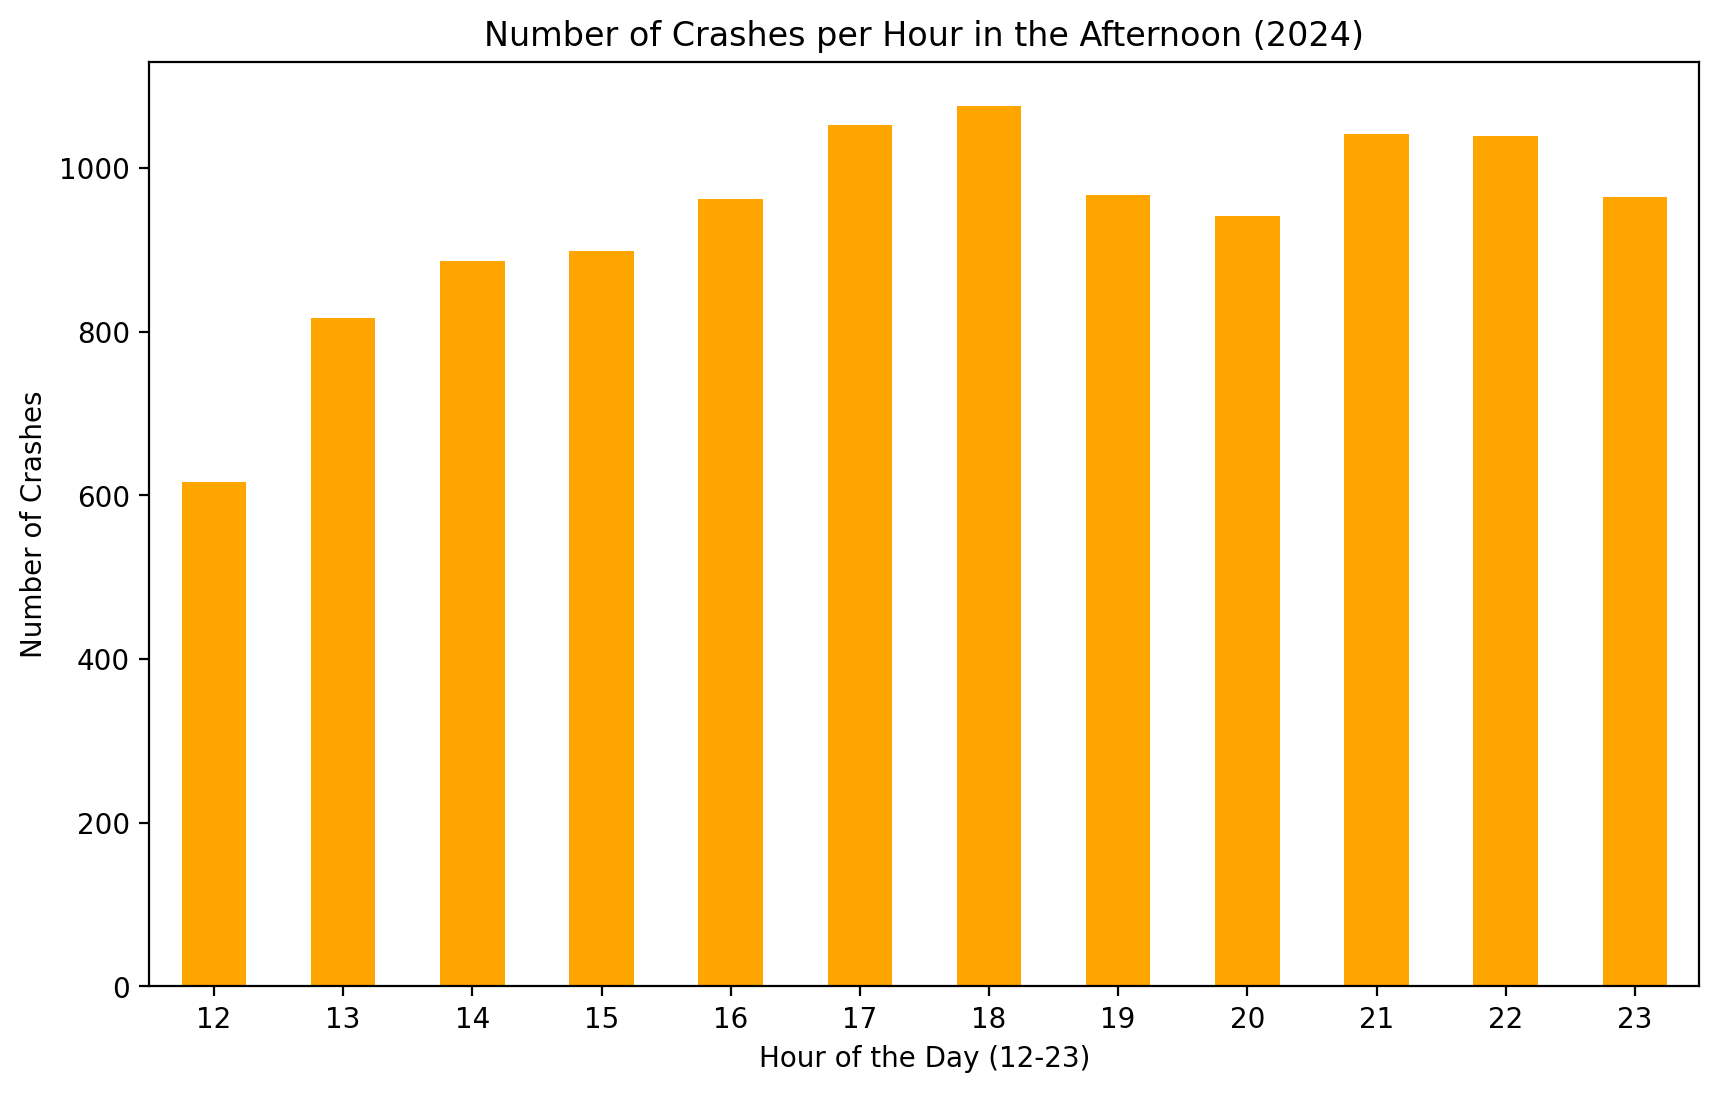

In [173]:
# Count the frequency of crashes per hour in the afternoon and display the result
# Use integer hours (12-23) on the x-axis
crashes_per_hour_afternoon = crashes_2024_afternoon['HOUR'].value_counts().sort_index()
crashes_per_hour_afternoon.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Crashes per Hour in the Afternoon (2024)')
plt.xlabel('Hour of the Day (12-23)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show();

<GeoAxes: xlabel='None', ylabel='None'>

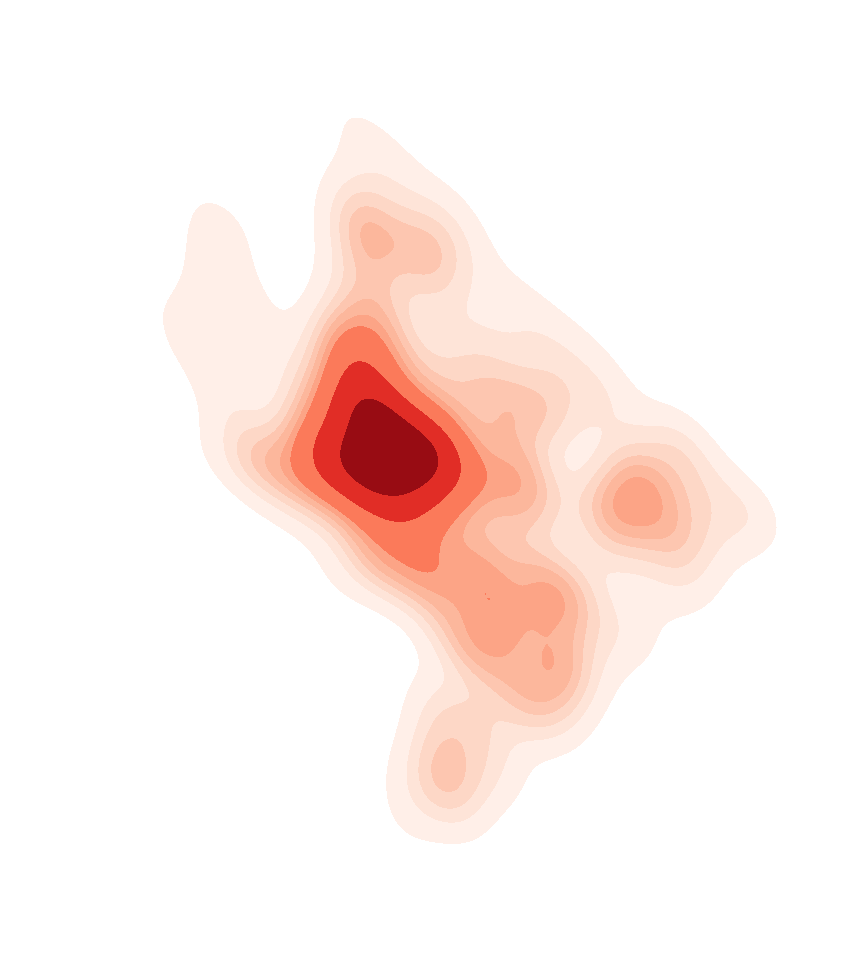

In [195]:
ax = gplt.polyplot(crashes_2024_morning, projection=gcrs.WebMercator(), zorder=1)
gplt.kdeplot(crashes_2024_morning, cmap='Reds', fill=True, ax=ax)

<GeoAxes: xlabel='None', ylabel='None'>

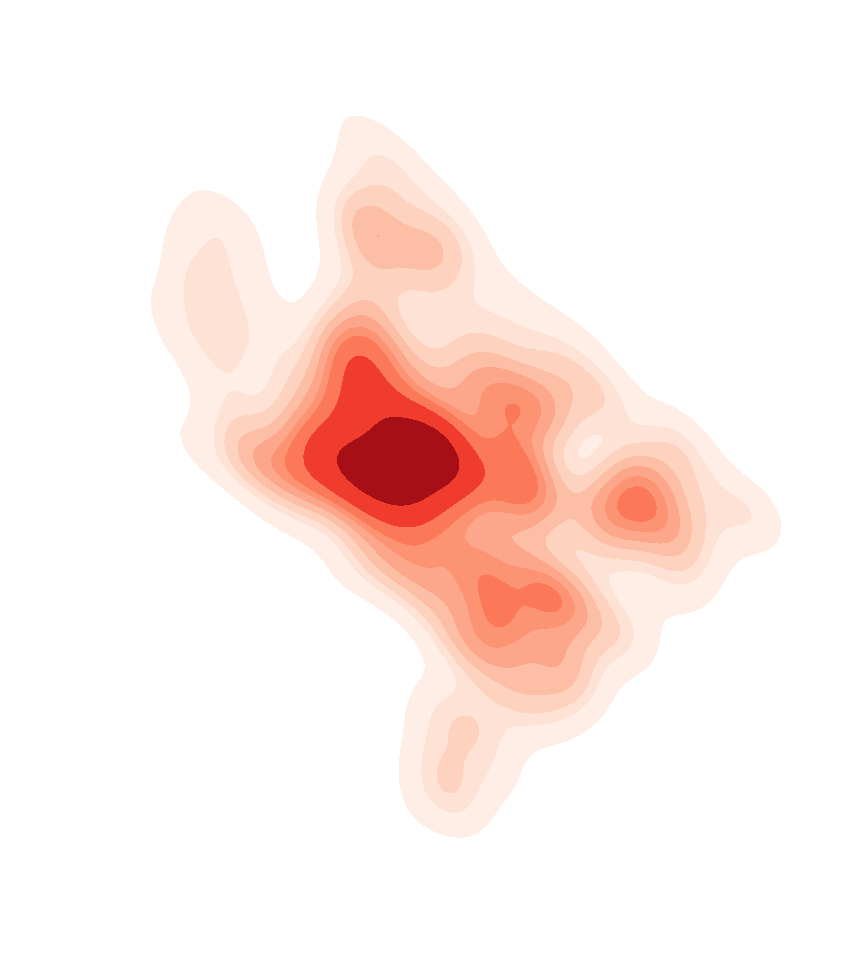

In [196]:
ax = gplt.polyplot(crashes_2024_afternoon, projection=gcrs.WebMercator(), zorder=1)
gplt.kdeplot(crashes_2024_afternoon, cmap='Reds', fill=True, ax=ax)